In [18]:
"""
Before beginning, I'll create a dummy variable for analysis.

Currently, there's no dummy variable.
I'd really enjoy being able to ctrl+enter on all Jupyter notebooks
paired with a solid set of example data to show off the methods.
"""
from numpy     import *
from functools import partial
import math

# The following commands are from Linear Algebra
def vector_subtract (v, w):
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def sum_of_squares(v):
    return dot(v, v)

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))
# This is taken from a separate learning library

In [2]:
"""
Suppose we have some function f that takes as input a vector
of real numbers and outputs a single real number. One simple
such function is the sum of squares:
"""
def sum_of_squares(v):
    return sum(v_i ** 2 for v_i in v)

In [4]:
"""
If f is a function of one variable, its derivative at point x measures
how f(x) changes when we make a very small change to x. It is defined as
the limit of the difference quotients.

The idea is that estimating a derivative is much more computationally 
mindful and gets us to approximately similar outcomes given the data
is well structured.
"""
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

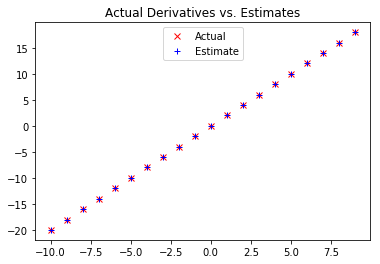

In [10]:
"""
What if you couldn't (or didn't want to) find the gradient? Although
we can't take limit in Python, we can estimate derivatives by 
evaluating the difference quotient for a very small epsilon.

Here is an example:
"""
def square(x):
    return x*x

def derivative(x):
    return 2*x

derivative_estimate = partial(difference_quotient, square, h=0.00001)

# plot to show that they're basically the same
import matplotlib.pyplot as plt
x = range(-10, 10)
plt.title("Actual Derivatives vs. Estimates")
plt.plot(x, map(derivative, x), 'rx', label='Actual')
plt.plot(x, map(derivative_estimate, x), 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

# As you can see, the fit lines are actually nearly identical.

In [16]:
"""
When f is a function of many variables, it has multiple partial derivatives,
each indicating how f changes when we make small changes in just one of the
input variables.

We calculate its i'th partal derivative by treating it as a function of
just its i'th variable, holding all other variables fixed:
"""
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

# Note, this method has a drawback: O(2n) rather than O(n) or O(1)

In [26]:
"""
Sometimes, we want to find the local minima of a gradient in a 3D space.
In order to do that, we can compute the sum of squares of the vector,
and then take a negative gradient step until we converge on the tolerance
area that we've specified.
"""
def step(v, direction, step_size):
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# Pick a random starting point
v = [random.randint(-10, 10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v)
    next_v   = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
print(v)

[-3.5372437838531188e-06, -1.7686218919265594e-06, -2.9477031532109354e-06]


In [27]:
"""
In order to put all of this together, we can define the function
minimize_batch, which is the empirical way of calculating gradient
descent. Unfortunately, batch processing is quite slow. Luckily, 
in the next dialogue box, we'll be going over Stochastic Gradient Descent
which is a randomized, more computationally efficient form of descension.

target_fn   is the function we'd like to minimize     
            = can be square, whatever function

gradient_fn is the calculated gradient of the function 
            = sum_of_squares_gradient(v)
            
theta_0     is the (user) given starting value         
            = [random.randint(-10, 10) for i in range(3)]

The description of the function is:
"Use gradient descent to find theta that minimizes target function"
"""
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta     = theta_0
    target_fn = safe(target_fn)
    value     = target_fn(theta)
    
    while True:
        gradient    = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
        
        # Choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        # Stop if we're converging
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value
                     

IndentationError: expected an indented block (<ipython-input-27-dabed13c8ccb>, line 15)

In [ ]:
"""
Sometimes, we need to maximize this batch descent, or rather, we need
to ascend the gradient rather than descend. We can do this by simply
negating the functions we've written
"""
def negate(f):
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    return lambda *args, *kwargs: [-y for y in f(*args, **kwargs)
                                   
def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)

In [29]:
"""
Stochastic Gradient Descent computes the gradient (and takes a step) 
utilizing only one variable at a time. This process iterates and descends
in random order on the entire data set until the total change in the dataset
is less than the given tolerance.

First, we'll set up our data to iterate in random order:
"""
def in_random_order(data):
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]
        
# The following functions were created in the Linear Algebra section

# End of Linear Algebra functions
        
# Then, we'll want to take a gradient step for every data point.
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data                           = zip(x, y)
    theta                          = theta_0
    alpha                          = alpha_0
    min_theta, min_value           = None, float("inf")
    iterations_with_no_improvement = 0
    
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            # We've found a new minimum; remember it,
            # and continue on to the subsequent step size.
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # No new minimum found
            iterations_with_no_improvement += 1
            alpha *= 0.9
        
        # Gradient step
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta      = vector_subtract(theta, 
                                         scalar_multiply(alpha, gradient_i))
        return min_theta
    
# As an added bonus, here's the ascension on the gradient:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)